<a href="https://colab.research.google.com/github/renancboni/-studying_analysis_civil_aviation_br/blob/main/analise_aviacao_civil_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandera

In [72]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [106]:
valores_ausentes = ['***','**','###!', '####', '****', '*****', 'NULL']
df = pd.read_csv('/content/drive/MyDrive/CursoPython/ARQUIVOS/ocorrencia_2010_2020.csv', sep=";", parse_dates=['ocorrencia_dia'], dayfirst=True, na_values=valores_ausentes)
df.head(10)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
5,39807,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
9,39711,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0


In [107]:
#adicionando coluna regiao


conditions = [
      (df['ocorrencia_uf'] == 'SP') | (df['ocorrencia_uf'] == 'RJ') | (df['ocorrencia_uf'] == 'SP') | (df['ocorrencia_uf'] == 'MG') | \
      (df['ocorrencia_uf'] == 'ES'),
      (df['ocorrencia_uf'] == 'SC') | (df['ocorrencia_uf'] == 'PR') | (df['ocorrencia_uf'] == 'RS'),
      (df['ocorrencia_uf'] == 'MT') | (df['ocorrencia_uf'] == 'MS') | (df['ocorrencia_uf'] == 'GO') | (df['ocorrencia_uf'] == 'DF'),
      (df['ocorrencia_uf'] == 'AC') | (df['ocorrencia_uf'] == 'AP') | (df['ocorrencia_uf'] == 'AM') | (df['ocorrencia_uf'] == 'PA') | \
      (df['ocorrencia_uf'] == 'RO') | (df['ocorrencia_uf'] == 'RR') | (df['ocorrencia_uf'] == 'TO'),
      (df['ocorrencia_uf'] == 'AL') | (df['ocorrencia_uf'] == 'BA') | (df['ocorrencia_uf'] == 'CE') | (df['ocorrencia_uf'] == 'MA') | \
      (df['ocorrencia_uf'] == 'PB') | (df['ocorrencia_uf'] == 'PI') | (df['ocorrencia_uf'] == 'PE') | (df['ocorrencia_uf'] == 'RN') | \
      (df['ocorrencia_uf'] == 'SE'),
     
      ]

choices = ['sudeste', 'sul', 'centro oeste', 'norte', 'nordeste']

df['regiao'] = np.select(conditions, choices)

In [108]:
#validação de colunas. os dados devem estar tipados como acima
#caso a coluna não venham no dataset usar required=False

schema = pa.DataFrameSchema(
    columns = {
        "codigo_ocorrencia":pa.Column(pa.Int),
        "codigo_ocorrencia2":pa.Column(pa.Int),
        "ocorrencia_classificacao":pa.Column(pa.String),
        "ocorrencia_cidade":pa.Column(pa.String),
        "ocorrencia_uf":pa.Column(pa.String, pa.Check.str_length(2,2), nullable=True), 
        "ocorrencia_aerodromo":pa.Column(pa.String, nullable=True),
        "ocorrencia_dia":pa.Column(pa.DateTime),
        "ocorrencia_hora":pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), nullable=True),
        "total_recomendacoes":pa.Column(pa.Int),
        "regiao":pa.Column(pa.String, nullable=True)     
        
    }
)

In [109]:
#validação do schema
schema.validate(df) 

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,regiao
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0,sudeste
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,norte
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,sudeste
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0,centro oeste
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,sul
...,...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0,sudeste
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0,norte
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0,sudeste
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,NaN,2020-12-31,09:00:00,0,centro oeste


In [110]:
df.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia2', 'ocorrencia_classificacao',
       'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'total_recomendacoes', 'regiao'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   codigo_ocorrencia         5752 non-null   int64         
 1   codigo_ocorrencia2        5752 non-null   int64         
 2   ocorrencia_classificacao  5752 non-null   object        
 3   ocorrencia_cidade         5752 non-null   object        
 4   ocorrencia_uf             5751 non-null   object        
 5   ocorrencia_aerodromo      3403 non-null   object        
 6   ocorrencia_dia            5752 non-null   datetime64[ns]
 7   ocorrencia_hora           5751 non-null   object        
 8   total_recomendacoes       5752 non-null   int64         
 9   regiao                    5752 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 449.5+ KB


In [112]:
#Tamanho do dataset
df.shape
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

O dataset possui 5752 registros e 10 atributos.


In [124]:
#dados nulos
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
regiao                         0
dtype: int64

In [125]:
#alterar para nulo a região de águas internacinais. 
df.loc[df.ocorrencia_cidade == 'ÁGUAS INTERNACIONAIS', ['regiao']] = pd.NA

In [189]:
df['regiao'].value_counts()

sudeste         2493
sul             1026
centro oeste     887
norte            737
nordeste         608
Name: regiao, dtype: int64

In [128]:
#ocorrência por estado
df['ocorrencia_uf'].value_counts()

SP    1373
MG     529
RJ     516
PR     485
RS     352
GO     309
MT     292
PA     287
AM     233
BA     213
SC     189
MS     151
DF     135
PE      98
CE      88
ES      75
MA      75
AC      58
RR      55
TO      54
PI      40
RO      37
AL      33
PB      24
SE      21
RN      16
AP      13
Name: ocorrencia_uf, dtype: int64

In [129]:
#quantidade de cidades
len(df['ocorrencia_cidade'].unique())
print(len(df['ocorrencia_cidade'].unique()), 'cidades tiveram algum tipo de ocorrência')

1099 cidades tiveram algum tipo de ocorrência


In [130]:
#TOP 10 cidades com mais ocorrências
df['ocorrencia_cidade'].value_counts().head(10)

RIO DE JANEIRO    321
SÃO PAULO         275
BELO HORIZONTE    188
GUARULHOS         153
CAMPINAS          150
GOIÂNIA           138
LONDRINA          137
BRASÍLIA          135
MANAUS            103
PORTO ALEGRE       99
Name: ocorrencia_cidade, dtype: int64

In [131]:
#ocorrencias por ano
df['ocorrencia_dia'].dt.year.value_counts()

2013    654
2012    647
2011    576
2014    567
2010    552
2020    510
2019    496
2015    471
2018    444
2017    432
2016    403
Name: ocorrencia_dia, dtype: int64

In [132]:
#contagem de ocorrências
df['ocorrencia_classificacao'].value_counts()

INCIDENTE          3171
ACIDENTE           1844
INCIDENTE GRAVE     737
Name: ocorrencia_classificacao, dtype: int64

In [133]:
#TOP 10 cidades com Incidentes Graves
filtro_inc_grave = df.ocorrencia_classificacao == 'INCIDENTE GRAVE'
df.loc[filtro_inc_grave, ['ocorrencia_cidade', 'ocorrencia_classificacao']].value_counts().head(10)

ocorrencia_cidade  ocorrencia_classificacao
GOIÂNIA            INCIDENTE GRAVE             28
RIO DE JANEIRO     INCIDENTE GRAVE             25
SÃO PAULO          INCIDENTE GRAVE             21
BRAGANÇA PAULISTA  INCIDENTE GRAVE             18
BELO HORIZONTE     INCIDENTE GRAVE             17
CURITIBA           INCIDENTE GRAVE             14
BRASÍLIA           INCIDENTE GRAVE             13
SALVADOR           INCIDENTE GRAVE             11
JUNDIAÍ            INCIDENTE GRAVE             11
LONDRINA           INCIDENTE GRAVE             10
dtype: int64

In [32]:
# Configurações dos gráficos
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20

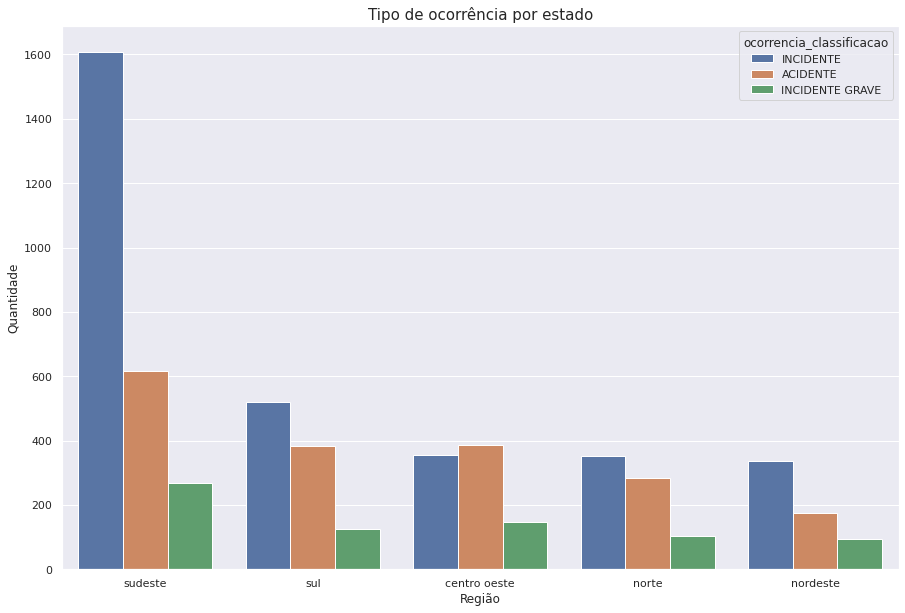

In [235]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x = "regiao", hue = 'ocorrencia_classificacao', data=df, order=df['regiao'].value_counts().index)
ax.set_title('Tipo de ocorrência por estado', fontsize=15)
ax.set_xlabel('Região', fontsize=12)
ax.set_ylabel('Quantidade', fontsize=12)
plt.show()

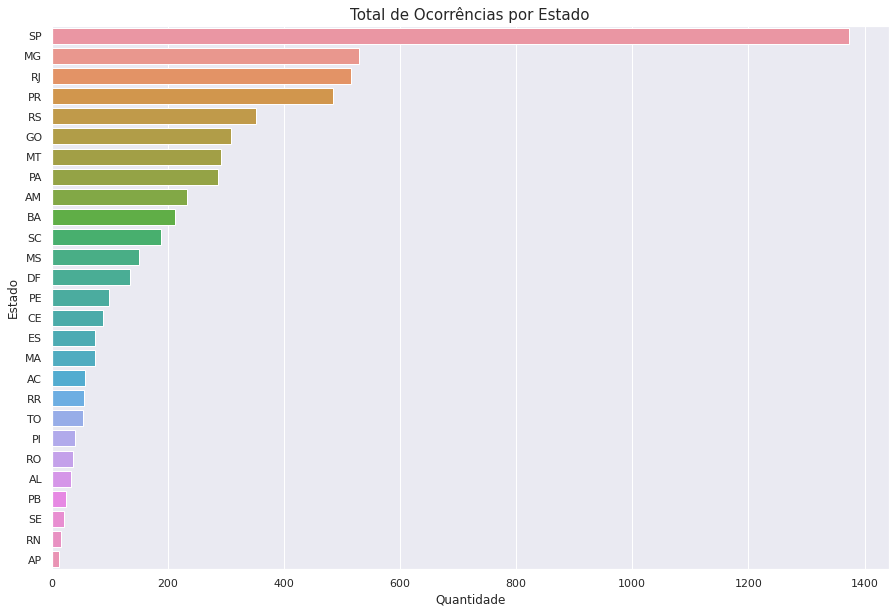

In [239]:
# Identificando as quantidades
sns.set_theme(style="darkgrid")
x = df['ocorrencia_uf'].value_counts().values
y = df['ocorrencia_uf'].value_counts().index
ax1 = sns.barplot( x=x, y=y )
ax1.set_title('Total de Ocorrências por Estado', fontsize=15) 
ax1.set_xlabel('Quantidade', fontsize=12)
ax1.set_ylabel('Estado', fontsize=12)
plt.show()

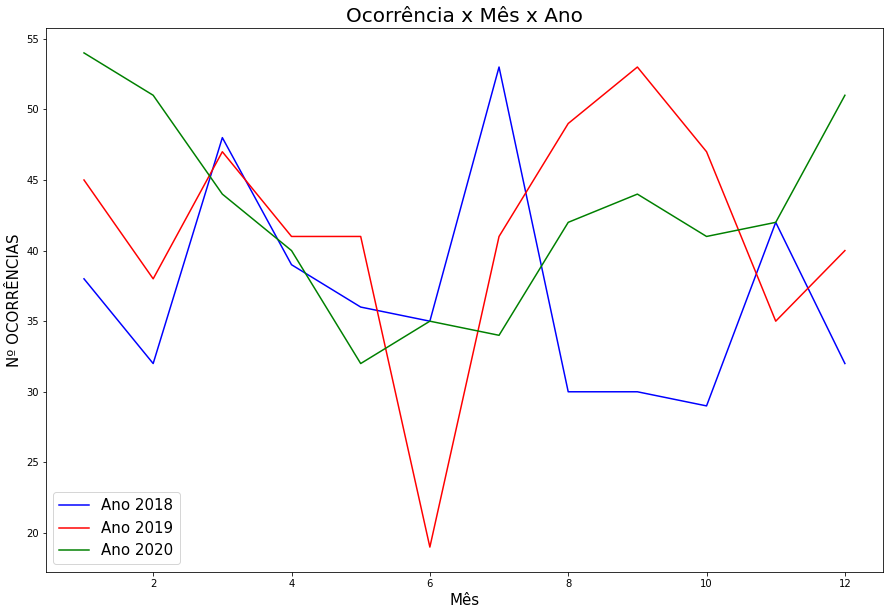

In [34]:
#Ocorrência por mês e ano de 2018 a 2020
#Selecionando 2018
df_2018 = df[df["ocorrencia_dia"].dt.year == 2018]
#Selecionando 2019
df_2019 = df[df["ocorrencia_dia"].dt.year == 2019]
#Selecionando 2020
df_2020 = df[df["ocorrencia_dia"].dt.year == 2020]
# comparativo
df_2018.groupby(df_2018["ocorrencia_dia"].dt.month)['ocorrencia_classificacao'].count().plot(color='blue', label='Ano 2018')
df_2019.groupby(df_2019["ocorrencia_dia"].dt.month)['ocorrencia_classificacao'].count().plot(color='red', label='Ano 2019')
df_2020.groupby(df_2020["ocorrencia_dia"].dt.month)['ocorrencia_classificacao'].count().plot(color='green', label='Ano 2020')
plt.title("Ocorrência x Mês x Ano")
plt.xlabel("Mês")
plt.ylabel("Nº OCORRÊNCIAS")
plt.legend()
plt.show()

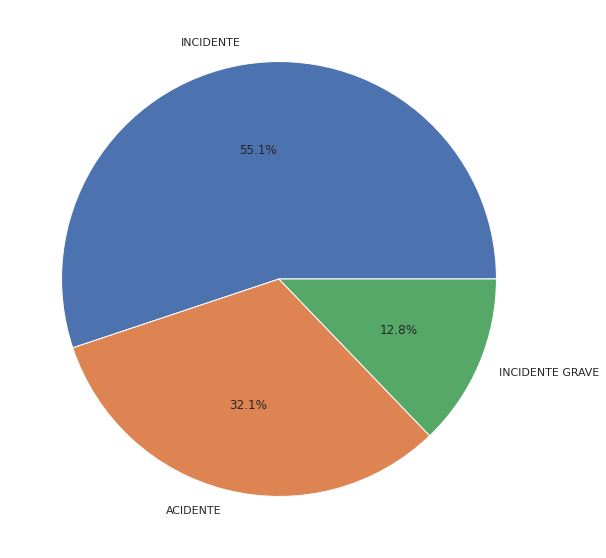

In [243]:
#Ocorrencias em %
ocorrencias = df['ocorrencia_classificacao'].value_counts()
ocorrenciasname = df['ocorrencia_classificacao'].unique()
plt.pie(ocorrencias, labels=ocorrenciasname, autopct='%1.1f%%')
plt.show()